<p  style="text-align: left;font-family: consolas; font-size: 12px; font-weight:bold;">
    author: Tsiapras Tilemachos 
</p>
<p  style="text-align: left;font-family: consolas; font-size: 12px; font-weight:bold;">
    date: 8/03/2022
</p>
<p  style="text-align: left;font-family: consolas; font-size: 12px; font-weight:bold;">
    revision: 1
</p>

<h1 style="font-family: arial, sans-serif; font-size:50px; color: #004225;text-align: center">  
[tt]
</h1>
<p style="font-family: arial, sans-serif; font-size: 16px; color: #000000; font-style: normal; font-weight: bold; font-variant: small-caps; text-align: left; letter-spacing: 0px; line-height: 20px;">
2D affine transformation.
</p>
<p style="font-family: arial, sans-serif; font-size: 16px; color: #000000; font-style: normal; font-weight: bold; font-variant: small-caps; text-align: left; letter-spacing: 0px; line-height: 20px;">
Affine means that the angles between lines are not preserved but the the parrallel lines remain parallel.
</p>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

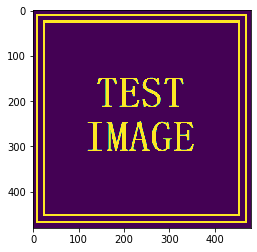

In [4]:
col = plt.imread(r"C:\Users\ttsiapras\Pictures\testImage.png",0)[:,:,0]
plt.imshow(col)


In [5]:
def reset_poins():
    global points
    y = np.arange(479,-1,-1)
    x = np.arange(0,480)
    xx,yy = np.meshgrid(x,y)

    xx = xx.flatten()
    yy = yy.flatten()
    ww = np.ones(yy.shape)
    points = np.vstack([xx,yy,ww]).T

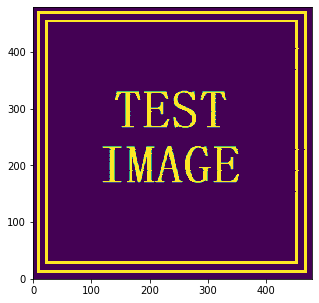

In [6]:
reset_poins()
col = col.flatten()

plt.figure(figsize=(5,5))
plt.pcolormesh(np.reshape(points[:,0],(480,480)),
              np.reshape(points[:,1],(480,480)),
              np.reshape(col,(480,480)))

In [7]:
def apply_transformation(points,col,table):
    for i in range(points.shape[0]):
        points[i] = table@points[i]
    
    plt.figure(figsize = (5,5))
    plt.pcolormesh(np.reshape(points[:,0],(480,480)),
              np.reshape(points[:,1],(480,480)),
              np.reshape(col,(480,480)))
    plt.grid()
    plt.xlim([-500, 500])
    plt.ylim([-100, 900])

## Simple 2D rotation

Rotation Component:

╒═══════════╤══════════╤═══╕
│  0.984808 │ 0.173648 │ 0 │
├───────────┼──────────┼───┤
│ -0.173648 │ 0.984808 │ 0 │
├───────────┼──────────┼───┤
│  0        │ 0        │ 1 │
╘═══════════╧══════════╧═══╛


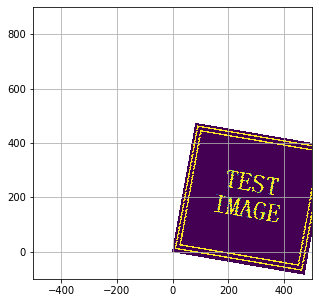

In [8]:
W = np.radians(10)
R = np.array([[np.cos(W),np.sin(W),0],[-np.sin(W),np.cos(W),0],[0,0,1]])
print("Rotation Component:\n")
print(tabulate(R, tablefmt="fancy_grid"))

apply_transformation(points,col,R)

## Simple 2D translation

Translation Component:

╒═══╤═══╤════╕
│ 1 │ 0 │ 60 │
├───┼───┼────┤
│ 0 │ 1 │  0 │
├───┼───┼────┤
│ 0 │ 0 │  1 │
╘═══╧═══╧════╛


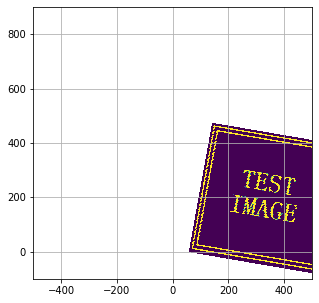

In [9]:
tx = 60
ty = 0
T = np.array([[1,0,tx],[0,1,ty],[0,0,1]])
print("Translation Component:\n")
print(tabulate(T, tablefmt="fancy_grid"))

apply_transformation(points,col,T)

## Simple 2D scalling

Scalling Component:

╒═══╤═══╤═══╕
│ 2 │ 0 │ 0 │
├───┼───┼───┤
│ 0 │ 2 │ 0 │
├───┼───┼───┤
│ 0 │ 0 │ 1 │
╘═══╧═══╧═══╛


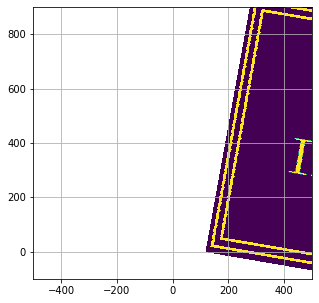

In [10]:
sx = 2
sy = 2
S = np.array([[sx,0,0],[0,sy,0],[0,0,1]])
print("Scalling Component:\n")
print(tabulate(S, tablefmt="fancy_grid"))

apply_transformation(points,col,S)

## Simple shear in X andY dirrection

Shear Component:

╒═══════════╤═══════════╤═══╕
│ 1         │ 0.0874887 │ 0 │
├───────────┼───────────┼───┤
│ 0.0874887 │ 1         │ 0 │
├───────────┼───────────┼───┤
│ 0         │ 0         │ 1 │
╘═══════════╧═══════════╧═══╛


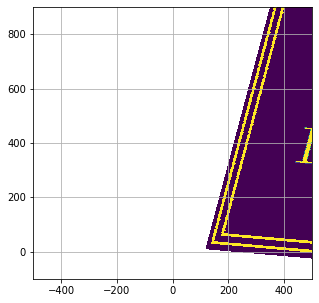

In [11]:
w1 = 5
Sx = np.tan(np.radians(w1))
w2 = 5
Sy = np.tan(np.radians(w2))

Sh = np.array([[1 , Sy, 0],
              [Sx, 1, 0],
              [0 , 0, 1]])

print("Shear Component:\n")
print(tabulate(Sh, tablefmt="fancy_grid"))

apply_transformation(points,col,Sh)

**I can alpply them all one after the onter or i can multiply them to get on final matrix thatn includes all the transformations**

In [12]:
#rotation
W = np.radians(-90)
R = np.array([[np.cos(W),np.sin(W),0],[-np.sin(W),np.cos(W),0],[0,0,1]])

#translation
tx = 100
ty = 100
T = np.array([[1,0,tx],[0,1,ty],[0,0,1]])

#Scalling
sx = 1.2
sy = 1.2
S = np.array([[sx,0,0],[0,sy,0],[0,0,1]])

#Shearing
w1 = 5
Sx = np.tan(np.radians(w1))
w2 = 5
Sy = np.tan(np.radians(w2))

Sh = np.array([[1 , Sy, 0],
              [Sx, 1, 0],
              [0 , 0, 1]])

Initial


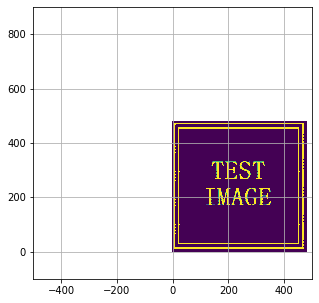

In [13]:
print("Initial")
reset_poins()
apply_transformation(points,col,np.identity(3))

transformed


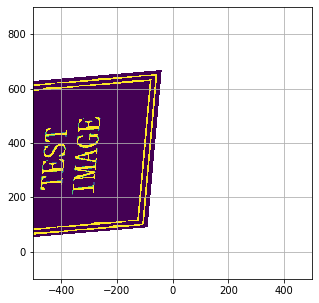

In [14]:
print("transformed")
reset_poins()
apply_transformation(points,col,Sh@R@T@S)

transformed


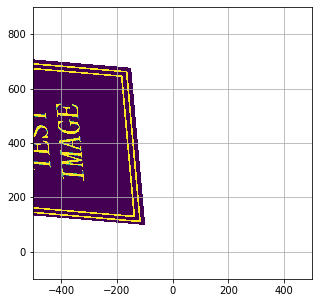

In [15]:
print("transformed")
reset_poins()
apply_transformation(points,col,R@T@S@Sh)